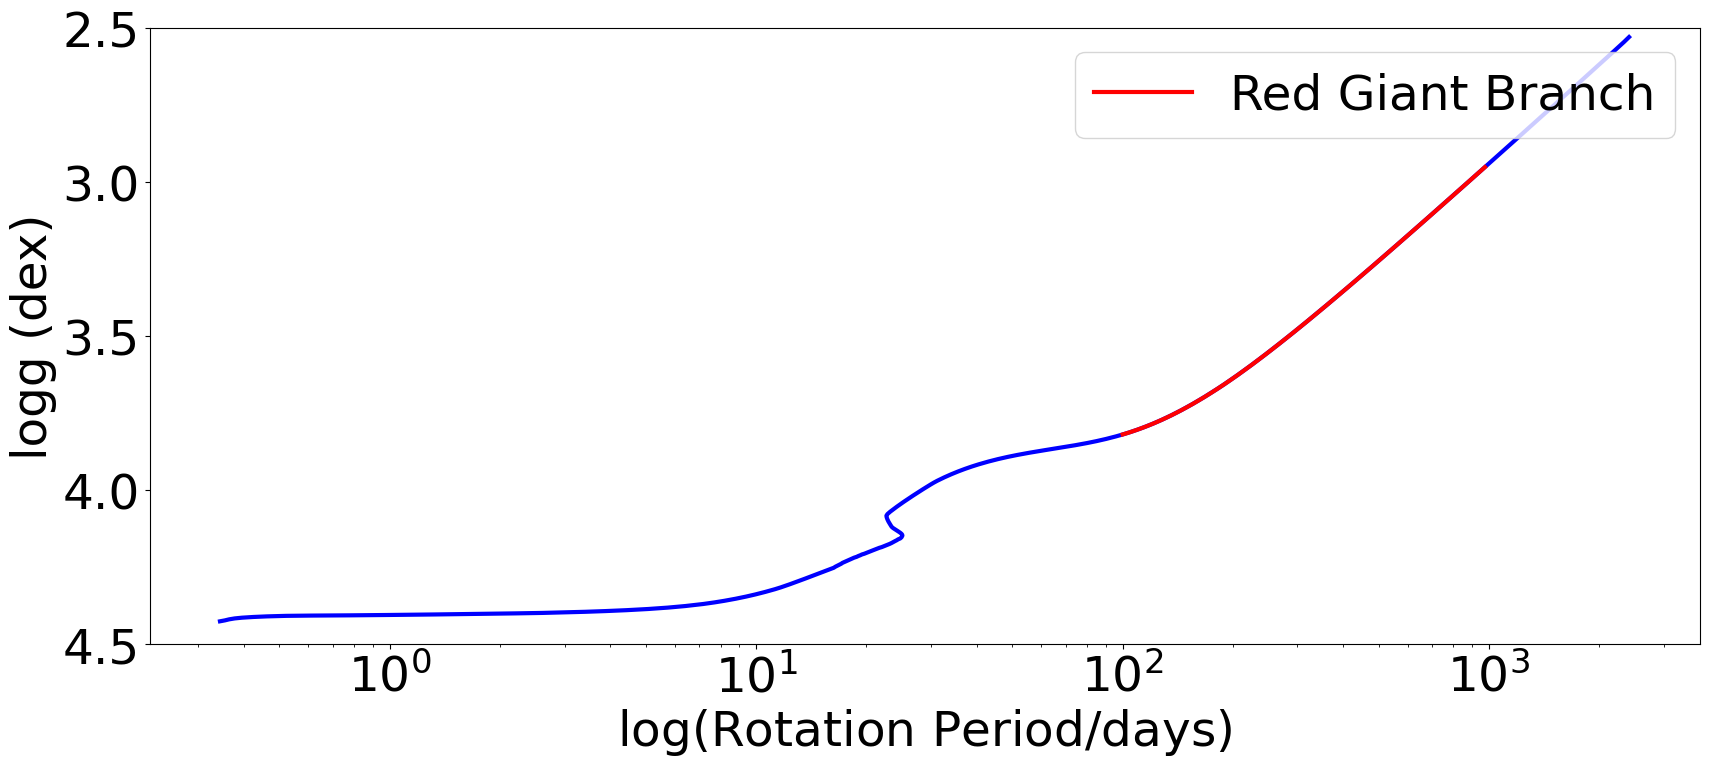

In [11]:
import kiauhoku as kh,matplotlib.pyplot as plt, numpy as np, pandas as pd

%matplotlib inline

grid = kh.load_interpolator('rocrit') #rocrit
# Stellar Grids: https://zenodo.org/records/11264222
# fastlaunch
# slowlaucnh
# rocrit
# mist - kernels dies
# yrec
# garstec - no Prot
# dartmouth - no Prot

# star = grid.get_star_eep((1.2295, 0.36,0,574)) # [mass, [Fe/H], [alpha/H], EEP], assuming solar alpha-abundance ([alpha/H]=0)
# print(star['Prot(days)'])
track = grid.get_track((1.2295, 0.36,0))# [mass, [Fe/H], [alpha/H]], assuming solar alpha-abundance ([alpha/H]=0)

plt.figure(figsize=(20,8))
index = np.argmax(track['logg'])
period_index = (track['Prot(days)'][index:]).reset_index(drop=True)
logg_index = (track['logg'][index:]).reset_index(drop=True)

RG_period_mask = (period_index >=100) & (period_index <= 1000)

Prot_new = period_index[RG_period_mask]
logg_new = logg_index[RG_period_mask]
# print(track['Prot(days)'][np.argmax(track['logg'])])
plt.semilogx(period_index,logg_index,'b',lw=3)
plt.semilogx(Prot_new,logg_new,'r',lw=3, label='Red Giant Branch')
# plt.axhline(3.0273,c='k', linestyle=":",linewidth=3.0)
# plt.axvline(826.047, c = 'k', linestyle=":",linewidth=3.0)
# plt.text(250,3.0,'826.047 d',fontsize=35)

plt.ylim(4.5,2.5)
plt.tick_params(axis='both', which='major', labelsize=35)
plt.xlabel(r'$\log(\text{Rotation Period/days})$',fontsize=35)
plt.ylabel(r'logg (dex)',fontsize=35)
plt.legend(loc='upper right', fontsize=35)
plt.savefig('Rot_period.png', dpi=100, facecolor='w', bbox_inches='tight')
# plt.close()